# Convert Models in Protocol 2
We will open and resave all model objects in protocol 2, so that they can be used from python 2.
For curiosity I will compare the file size and loading speed.

In [1]:
import os
from glob import glob
from sklearn.externals import joblib
import pandas as pd
from matplotlib import pyplot as plt
from time import time

In [2]:
proj_root = os.path.abspath(os.path.join('../')) 
modeldir = os.path.join(proj_root, 'models/')
prot2dir = os.path.join(modeldir, 'prot2')

if not os.path.isdir(modeldir): os.makedirs(modeldir)
if not os.path.isdir(prot2dir): os.makedirs(prot2dir)

In [3]:
for from_file in glob(os.path.join(modeldir, '*.pkl')):
    print(os.path.basename(from_file))
    model = joblib.load(from_file)
    out_file = os.path.join(prot2dir, os.path.basename(from_file)) 
    joblib.dump(model, out_file, protocol=2)

label_nb.pkl
label_pca-mlp.pkl
caption-ja_pca-mlp-step2-full.pkl
caption-en-paren_pca-mlp-full.pkl
caption-ja-loose_pca-mlp-full.pkl
caption-en_pca-mlp-full.pkl
caption-en-letter_pca-mlp-full.pkl
caption-ja_pca-mlp-full.pkl
label_mlp.pkl
label_pca-mlp-full.pkl
caption-en_pca-loose-mlp-full.pkl
caption-ja_pca-mlp-step1-full.pkl
label_mlp-gridbest.pkl
caption_pca-mlp-gridbest.pkl
label_mlp-full.pkl


## Compare size difference

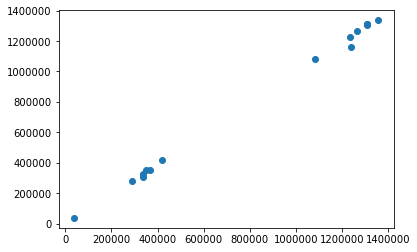

0     1.000000
1     1.002428
2     1.001639
3     1.005159
4     1.030306
5     1.024891
6     1.068447
7     1.002572
8     1.000634
9     1.097722
10    1.045308
11    1.002319
12    1.000437
13    1.006985
14    1.015844
dtype: float64


,file,size_prot2,size_prot3
0,label_nb.pkl,37689,37689
1,label_pca-mlp.pkl,351288,350437
2,caption-ja_pca-mlp-step2-full.pkl,1083999,1082225
3,caption-en-paren_pca-mlp-full.pkl,1234185,1227851
4,caption-ja-loose_pca-mlp-full.pkl,289989,281459
5,caption-en_pca-mlp-full.pkl,335902,327744
6,caption-en-letter_pca-mlp-full.pkl,1236955,1157713
7,caption-ja_pca-mlp-full.pkl,1306930,1303577
8,label_mlp.pkl,1309843,1309013
9,label_pca-mlp-full.pkl,338476,308344


In [4]:
data = []
for file3 in glob(os.path.join(modeldir, '*.pkl')):
    file2 = os.path.join(prot2dir, os.path.basename(file3))
    data.append({'file':os.path.basename(file3), 
                 'size_prot3':os.path.getsize(file3), 
                 'size_prot2':os.path.getsize(file2), })
data = pd.DataFrame(data)
plt.scatter(data['size_prot2'], data['size_prot3'])
plt.show()

print(data['size_prot2'] / data['size_prot3'])
data

Hmm, almost same size (up to 1.1% size difference)

## Compare load speed 

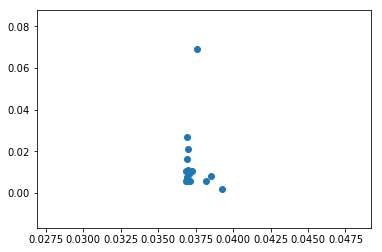

0     20.274877
1      6.324360
2      4.681655
3      3.536648
4      3.373076
5      3.475516
6      0.544146
7      3.987049
8      6.502544
9      1.364730
10     2.260666
11     4.662822
12     6.458240
13     6.304073
14     1.748848
dtype: float64


,file,time_prot2,time_prot3
0,label_nb.pkl,0.039251,0.001936
1,label_pca-mlp.pkl,0.038198,0.006040
2,caption-ja_pca-mlp-step2-full.pkl,0.038551,0.008235
3,caption-en-paren_pca-mlp-full.pkl,0.037262,0.010536
4,caption-ja-loose_pca-mlp-full.pkl,0.036997,0.010968
5,caption-en_pca-mlp-full.pkl,0.036889,0.010614
6,caption-en-letter_pca-mlp-full.pkl,0.037572,0.069048
7,caption-ja_pca-mlp-full.pkl,0.037067,0.009297
8,label_mlp.pkl,0.036875,0.005671
9,label_pca-mlp-full.pkl,0.036918,0.027051


In [5]:
data2 = []
for file3 in glob(os.path.join(modeldir, '*.pkl')):
    file2 = os.path.join(prot2dir, os.path.basename(from_file))
    s = time()
    joblib.load(file3)
    time3 = time()-s
    
    s = time()
    joblib.load(file2)
    time2 = time()-s
    data2.append({'file':os.path.basename(file3), 
                'time_prot3':time3, 
                'time_prot2':time2})    
data2 = pd.DataFrame(data2)

plt.scatter(data2['time_prot2'], data2['time_prot3'])
plt.show()

print(data2['time_prot2'] / data2['time_prot3'])

data2

About 3 to 5 times faster load for protocol 3!